### Arvores de Decisão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter, defaultdict
from functools import partial

/tmp/ipykernel_11173/1506702196.py:2: RuntimeWarning: divide by zero encountered in log2
  ys = -xs*np.log2(xs)
/tmp/ipykernel_11173/1506702196.py:2: RuntimeWarning: invalid value encountered in multiply
  ys = -xs*np.log2(xs)


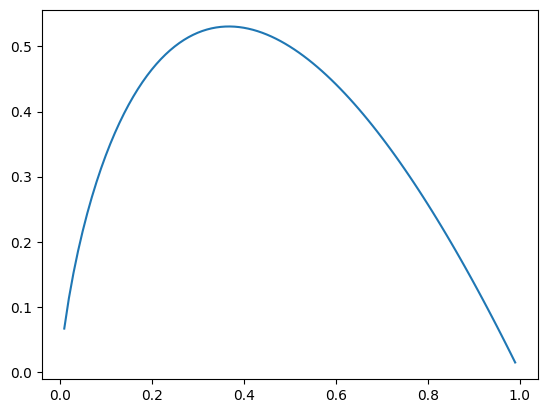

In [90]:
xs = np.arange(0,1,0.01)
ys = -xs*np.log2(xs)

plt.plot(xs,ys)
plt.show()

In [91]:
inputs = [
    ({'level': 'Senior','lang':'Java','tweets':'no','phd':'no'},False),
    ({'level': 'Senior','lang':'Java','tweets':'no','phd':'yes'},False),
    ({'level': 'Mid','lang':'Python','tweets':'no','phd':'no'},True),
    ({'level': 'Junior','lang':'Python','tweets':'no','phd':'no'},True),
    ({'level': 'Junior','lang':'R','tweets':'yes','phd':'no'},True),
    ({'level': 'Junior','lang':'R','tweets':'yes','phd':'yes'},False),
    ({'level': 'Mid','lang':'R','tweets':'yes','phd':'yes'},True),
    ({'level': 'Senior','lang':'Python','tweets':'no','phd':'no'},False),
    ({'level': 'Senior','lang':'R','tweets':'yes','phd':'no'},True),
    ({'level': 'Junior','lang':'Python','tweets':'yes','phd':'no'},True),
    ({'level': 'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
    ({'level': 'Mid','lang':'Python','tweets':'no','phd':'yes'},True),
    ({'level': 'Mid','lang':'Java','tweets':'yes','phd':'no'},True),
    ({'level': 'Junior','lang':'Python','tweets':'no','phd':'yes'},False),
]

In [92]:
def entropy(class_probabilities):
    return sum(-p*math.log(p,2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count/total_count for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _,label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

def partition_entropy(subsets):
    total_count = sum(len(subset) for subset in subsets)
    return sum(data_entropy(subset)*len(subset)/total_count for subset in subsets)

In [93]:
def partition_by(inputs, attribute):
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input)
    return groups

def partition_entropy_by(inputs, attribute):
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())


In [94]:
for key in ['level','lang','tweets','phd']:
    print(key,partition_entropy_by(inputs,key))

print('\n')
senior_inputs = [(input,label) for input,label in inputs if input['level'] == 'Senior']

for key in ['lang','tweets','phd']:
    print(key,partition_entropy_by(senior_inputs,key))


print('\n')
mid_inputs = [(input,label) for input,label in inputs if input['level'] == 'Mid']

for key in ['lang','tweets','phd']:
    print(key,partition_entropy_by(mid_inputs,key))


print('\n')
junior_inputs = [(input,label) for input,label in inputs if input['level'] == 'Junior']

for key in ['lang','tweets','phd']:
    print(key,partition_entropy_by(junior_inputs,key))

level 0.6935361388961919
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617


lang 0.4
tweets 0.0
phd 0.9509775004326938


lang 0.0
tweets 0.0
phd 0.0


lang 0.9509775004326938
tweets 0.9509775004326938
phd 0.0


In [ ]:
def classify(tree, input):
    
    if tree in [True,False]:
        return tree
    
    attribute, subtree_dict = tree

    subtree_key = input.get(attribute)

    if subtree_key not in subtree_dict:
        subtree_key = None

    subtree = subtree_dict[subtree_key]
    
    return classify(subtree, input)

def build_tree_id3(inputs, split_canditates=None):

    if split_canditates is None:
        split_canditates = inputs[0][0].keys()

    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues

    if num_trues == 0: return False
    if num_falses == 0: return True

    if not split_canditates:
        return num_trues >= num_falses
    
    best_attribute = min(split_canditates, key=partial(partition_entropy_by,inputs))

    partitions = partition_by(inputs, best_attribute)

    new_candidates = [a for a in split_canditates if a != best_attribute]

    subtrees = { attribute_value: build_tree_id3(subset,new_candidates) 
                for attribute_value, subset in partitions.items()}

    subtrees[None] = num_trues > num_falses

    return (best_attribute,subtrees)



In [96]:
tree = build_tree_id3(inputs)


classify(tree, {'lang':'Java'})

True


True